In [55]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

import warnings
warnings.filterwarnings('ignore')

In [112]:
df_1 = pd.read_csv('./data/data.csv')
df_2 = pd.read_csv('./data/datav2.csv')
df = pd.read_csv('./data/yonelimfinal.csv')
api_form = pd.read_csv('./data/googleAPI.csv')
model_output = pd.read_csv('./data/model_output.csv')

concatenated_df = pd.concat([df_1, df_2, df, api_form, model_output], axis=0, ignore_index=True)

data = concatenated_df.copy()

In [ ]:
'''
    Soru1/Question1: Do you think our Economic Status is good?
    Soru2/Question2: Need Reform in Education?
    Soru3/Question3: Resolve Privatization Are You?
    Soru4/Question4: Should the state use a penalty like death penalty for certain crimes?
    Soru5/Question5: Do you find our journalists neutral enough?
    Soru6/Question6: From 22:00 am Then Are You Supporting the Prohibition to Buy Drinks?
    Soru7/Question7: Do You Want to Live in a Secular State?
    Soru8/Question8: Are you supporting the abortion ban?
    Soru9/Question9: Do you think that the extraordinary state (Ohal) restricts Freedoms?
    Soru10/Question10: Would you like a new part of the parliament to enter?
'''

In [ ]:
'''
    Soru1/Question1: Ekonomik durumumuzun iyi olduğunu düşünüyor musunuz?
    Soru2/Question2: Eğitimde reforma ihtiyaç var mı?
    Soru3/Question3: Özelleştirmelerin ( örneğin devlet kurumlarının özel sektöre satılması veya devredilmesi  ) geri alınmasını destekler misiniz?
    Soru4/Question4: Devletin bazı suçlar için idam gibi cezaları kullanması gerektiğini düşünüyor musunuz?
    Soru5/Question5: Gazetecilerimizi yeterince tarafsız buluyor musunuz?
    Soru6/Question6: 22:00'den sonra alkollü içki satışının yasaklanmasını destekliyor musunuz?
    Soru7/Question7: Laik bir devlette yaşamak istiyor musunuz?
    Soru8/Question8: Kürtaj yasağını destekliyor musunuz?
    Soru9/Question9: "Olağanüstü halin (OHAL) özgürlükleri kısıtladığını düşünüyor musunuz?"
    Soru10/Question10: Parlamentoya yeni bir parti girmesini ister misiniz?
'''

In [116]:
for year in data['Timestamp']:
    if year[5:9] != '2018':
        print('There are years other than 2018')
        break
data = data.drop(columns=['Timestamp'], axis=1)

There are years other than 2018


In [61]:
data.replace(
    ("Evet","Hayır"), ("Yes","No"), 
    inplace = True
)
data.replace(
    ("Erkek","Kadın"), ("Male","Female"), 
    inplace = True
)
data.replace(
    ("Marmara","Ege","Karadeniz","Akdeniz","İç Anadolu", "Doğu Anadolu", "Güneydoğu"),
    ("Marmara","Aegean","Black Sea","Mediterrenian","Central Anatolia","Eastern Anatolia","Southeast"), 
    inplace = True
)

data.replace(
    ("İlkokul","Ortaokul","Lise","Ön Lisans","Lisans", "Lisans Üstü"), 
    ("Primary School","Middle School","High School","Associate's Degree","University","Master's Degree"), 
    inplace = True
)

In [62]:
data.columns = [
    'Gender', 'Age', 'Region', 'Education', 'Question1', 'Question2', 'Question3', 
    'Question4', 'Question5', 'Question6', 'Question7', 'Question8', 'Question9', 
    'Question10', 'Party'
]

In [63]:
data.head()

,Gender,Age,Region,Education,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Party
0,Male,18-30,Marmara,University,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,IYI PARTI
1,Male,18-30,Marmara,University,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,AKP
2,Female,18-30,Marmara,University,No,Yes,No,No,No,No,Yes,No,Yes,Yes,DIĞER
3,Male,0-18,Marmara,High School,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,IYI PARTI
4,Male,18-30,Marmara,Associate's Degree,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,IYI PARTI


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      1397 non-null   object
 1   Age         1397 non-null   object
 2   Region      1397 non-null   object
 3   Education   1397 non-null   object
 4   Question1   1397 non-null   object
 5   Question2   1397 non-null   object
 6   Question3   1397 non-null   object
 7   Question4   1397 non-null   object
 8   Question5   1397 non-null   object
 9   Question6   1397 non-null   object
 10  Question7   1397 non-null   object
 11  Question8   1397 non-null   object
 12  Question9   1397 non-null   object
 13  Question10  1397 non-null   object
 14  Party       1397 non-null   object
dtypes: object(15)
memory usage: 163.8+ KB


In [65]:
data.describe().T

,count,unique,top,freq
Gender,1397,2,Male,1217
Age,1397,5,18-30,654
Region,1397,7,Marmara,693
Education,1397,6,High School,700
Question1,1397,2,No,881
Question2,1397,2,Yes,1320
Question3,1397,2,Yes,775
Question4,1397,2,Yes,787
Question5,1397,2,No,1317
Question6,1397,2,No,956


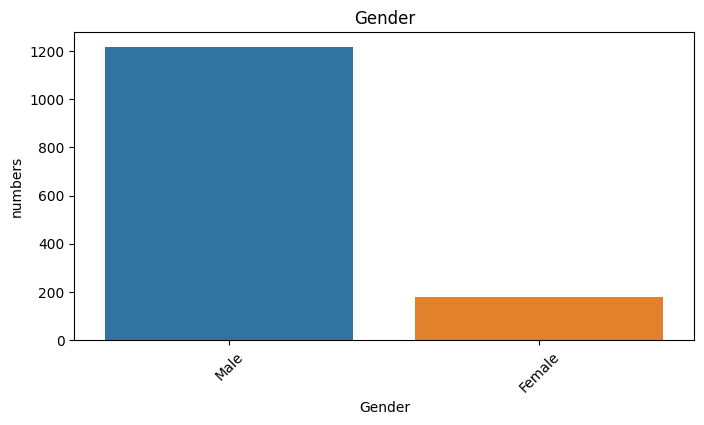

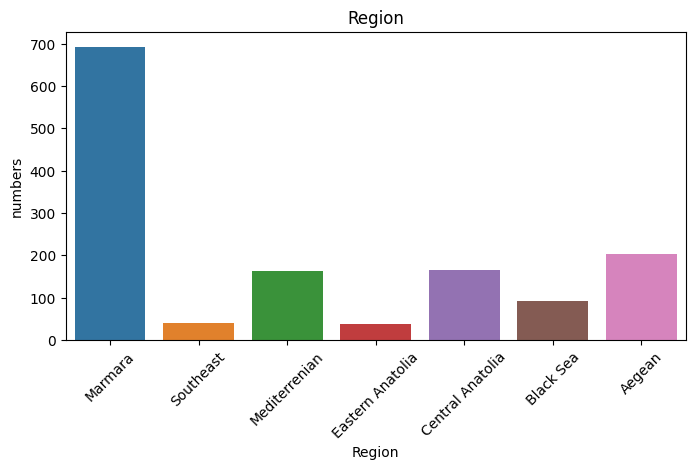

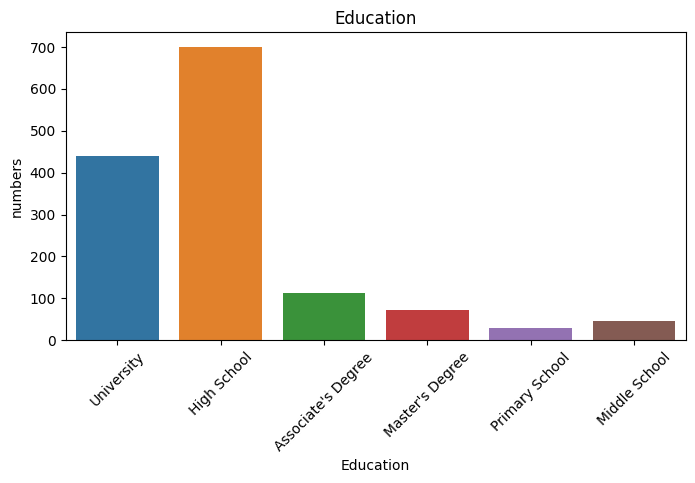

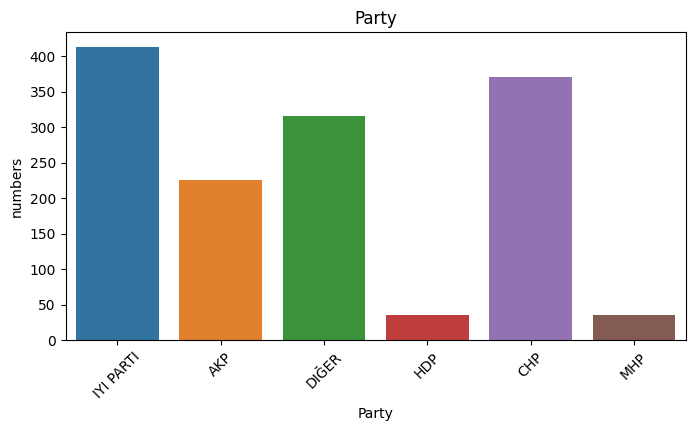

In [66]:
categorical_columns = ['Gender', 'Region', 'Education', 'Party']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("numbers")
    plt.xticks(rotation=45)
    plt.show()

In [67]:
quiestion_cols = {    
    'Question1' : 'Do you think our Economic Status is good?',
    'Question2' : 'Need Reform in Education?',
    'Question3' : 'Resolve Privatization Are You?',
    'Question4' : 'Should the state use a penalty like death penalty for certain crimes?',
    'Question5' : 'Do you find our journalists neutral enough?',
    'Question6' : 'From 22:00 am Then Are You Supporting the Prohibition to Buy Drinks?',
    'Question7' : 'Do You Want to Live in a Secular State?',
    'Question8' : 'Are you supporting the abortion ban?',
    'Question9' : 'Do you think that the extraordinary state (Ohal) restricts Freedoms?',
    'Question10' : 'Would you like a new part of the parliament to enter?'
}

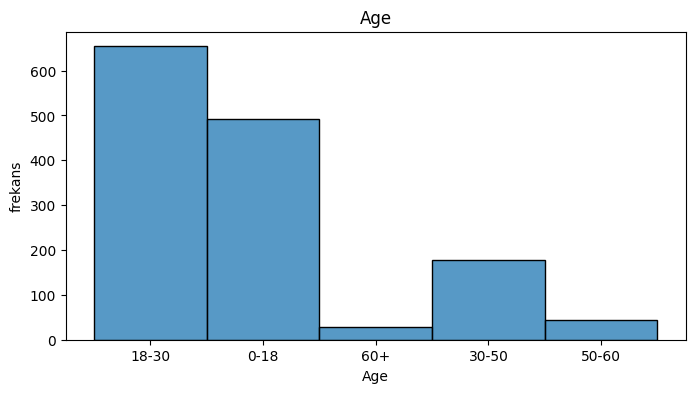

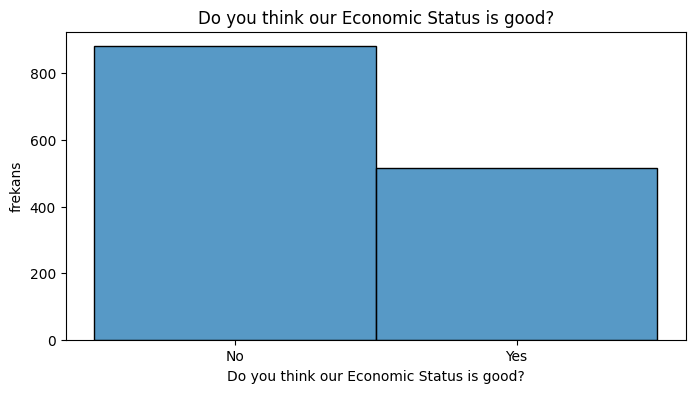

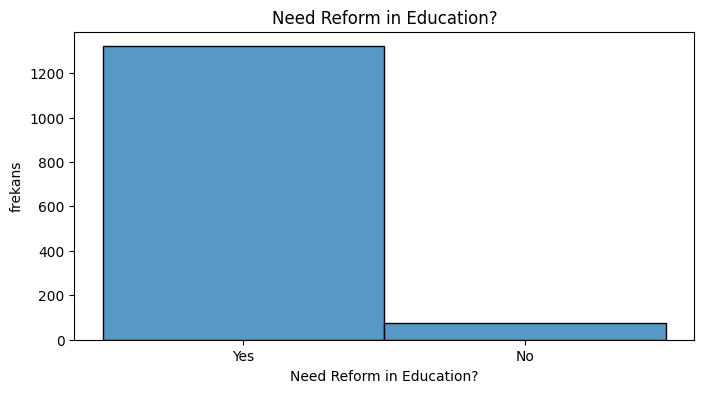

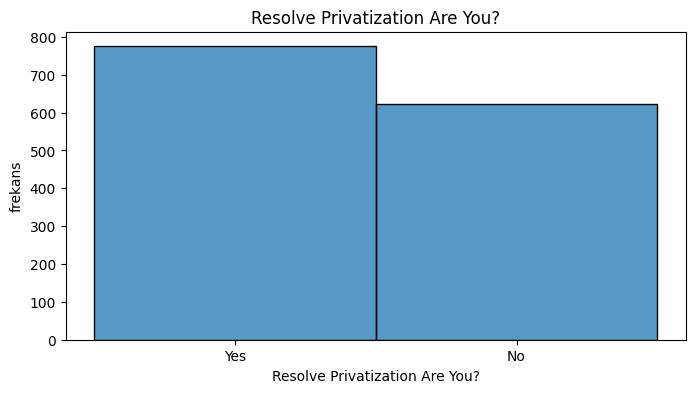

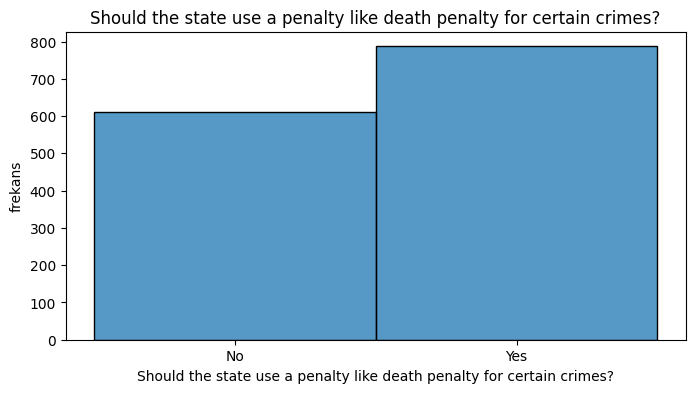

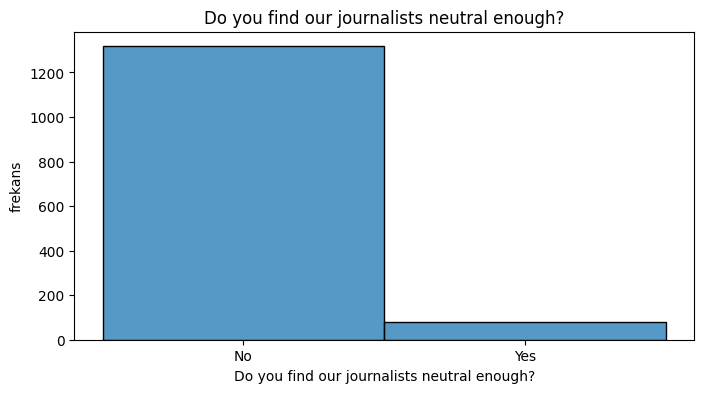

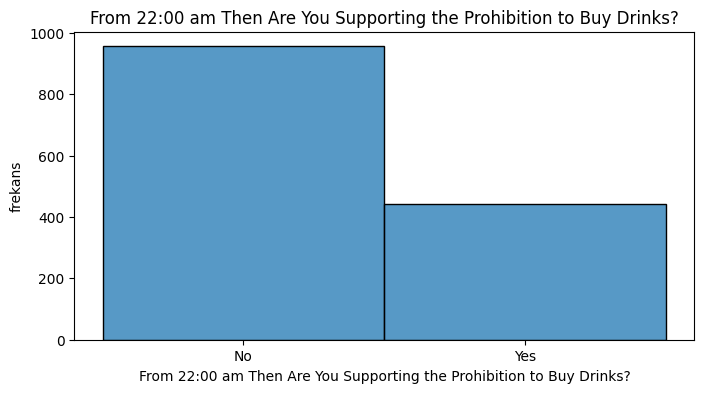

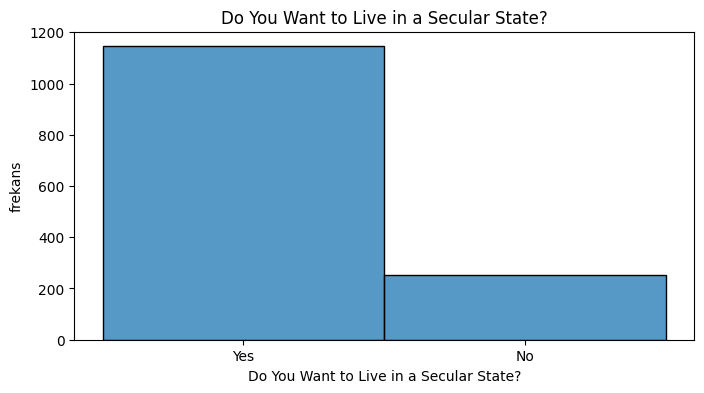

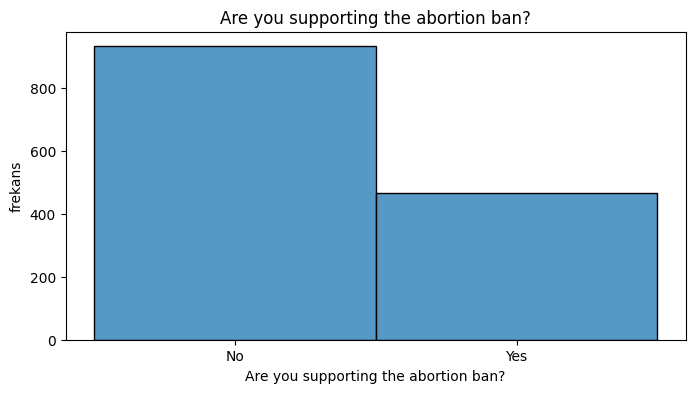

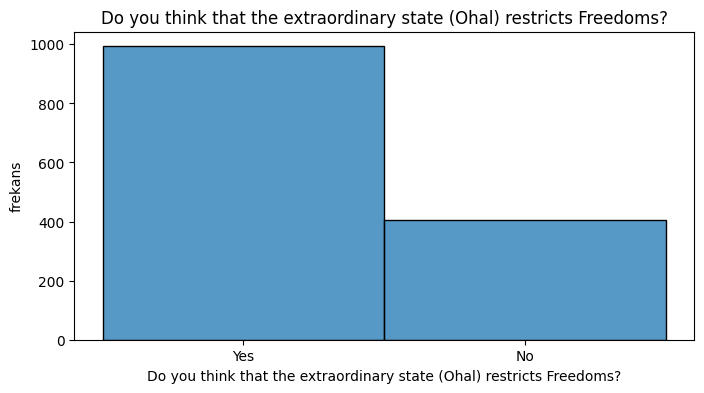

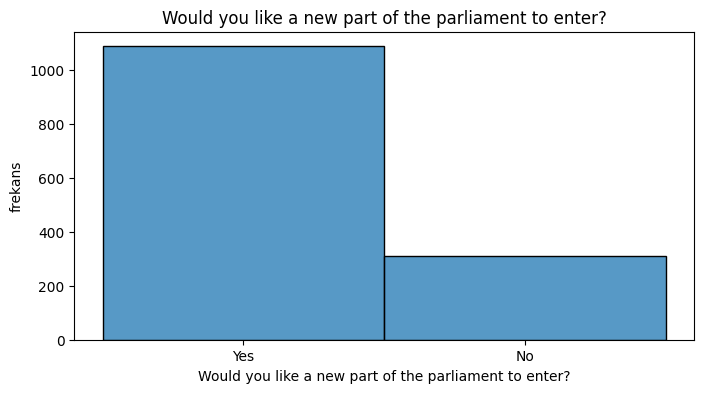

In [68]:
numerical_columns = [
        'Age', 'Question1', 'Question2', 'Question3', 
        'Question4', 'Question5', 'Question6', 'Question7', 
        'Question8', 'Question9', 'Question10'
]

for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col])
        
        if col == 'Age':
                plt.xlabel(col)
                plt.title(col)
        else:
                plt.xlabel(quiestion_cols[col])
                plt.title(quiestion_cols[col])

        plt.ylabel('frekans')
        plt.show()


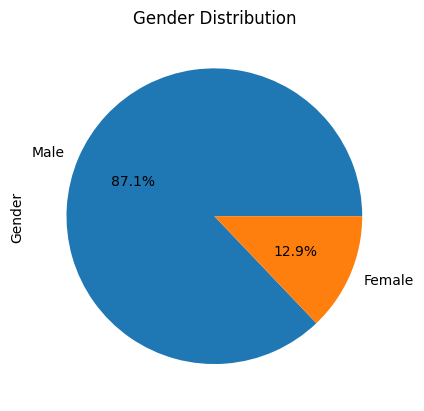

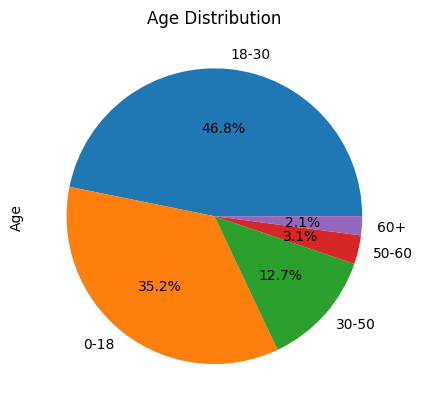

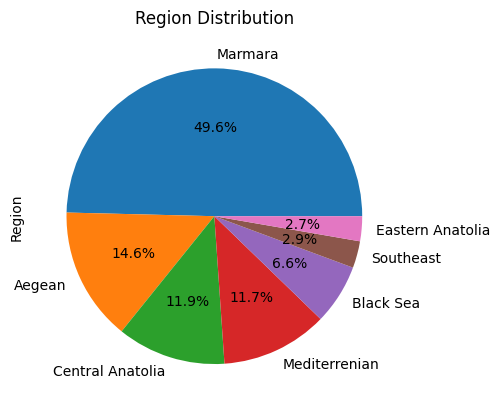

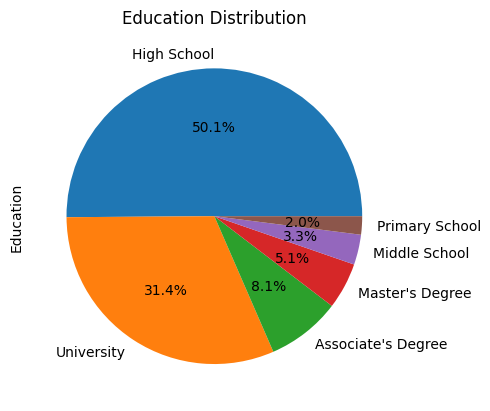

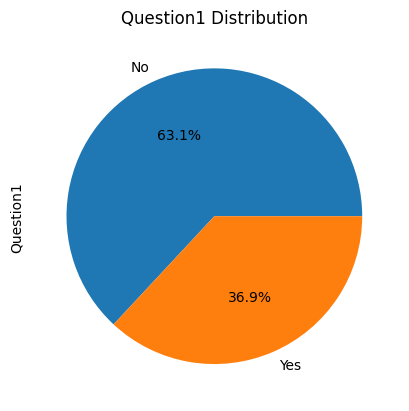

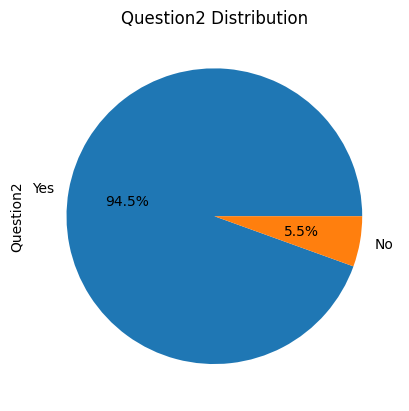

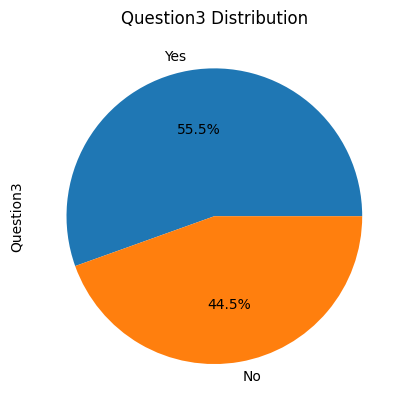

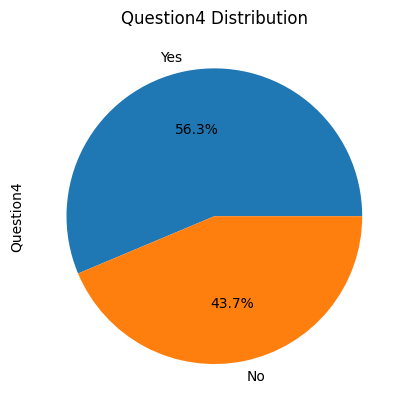

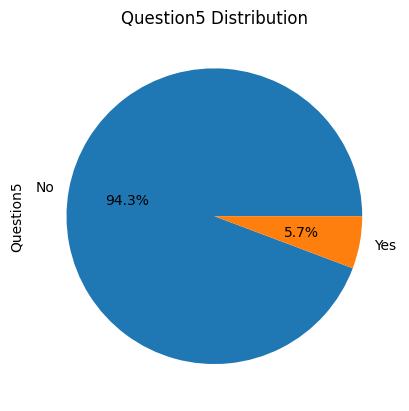

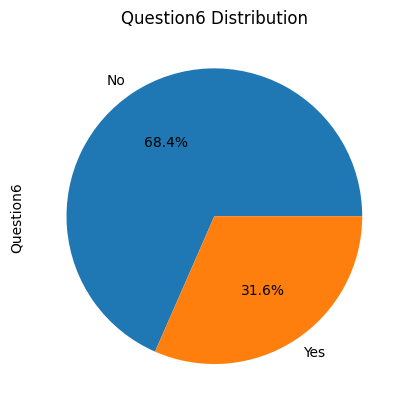

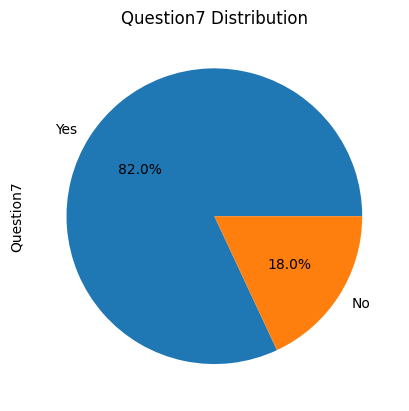

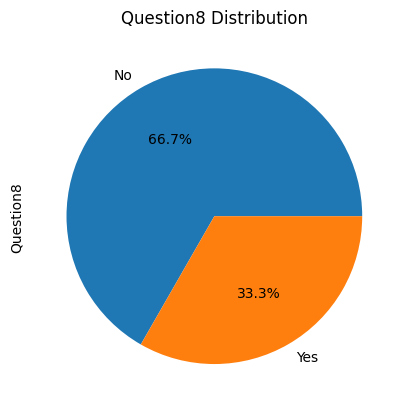

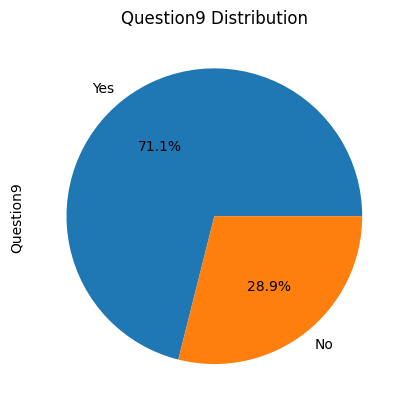

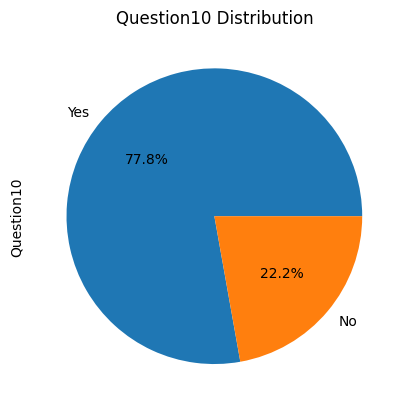

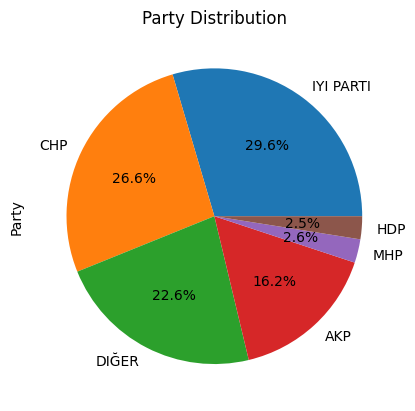

In [69]:
counter = 0

for col in data.columns:
    data[col].value_counts().plot(kind='pie', autopct='%.1f%%')
    plt.title(f'{col} Distribution')
    plt.show()

In [70]:
diger = data[data['Party']=='DIĞER'].drop(['Party'],axis=1)
mhp = data[data['Party']=='MHP'].drop(['Party'],axis=1)
iyi_parti = data[data['Party']=='IYI PARTI'].drop(['Party'],axis=1)
akp = data[data['Party']=='AKP'].drop(['Party'],axis=1)
hdp = data[data['Party']=='HDP'].drop(['Party'],axis=1)
chp = data[data['Party']=='CHP'].drop(['Party'],axis=1)

all_party = [diger, mhp, iyi_parti, akp, hdp, chp]

In [71]:
def pie_distribution(party, party_name):

    for col in party.columns:
        
        party[col].value_counts().plot(kind='pie', autopct='%.1f%%')
        plt.title(f'{col} Distribution of {party_name}')
        plt.show()

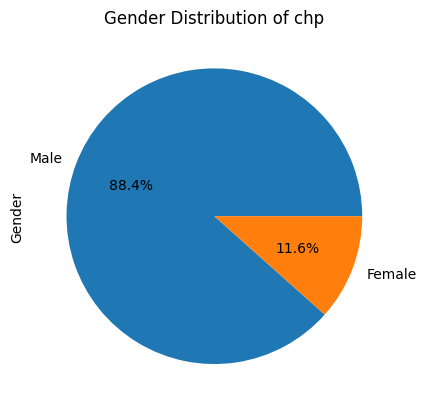

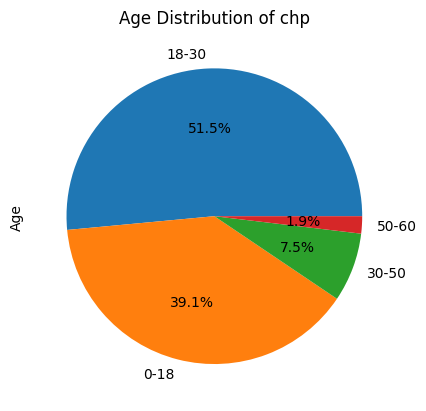

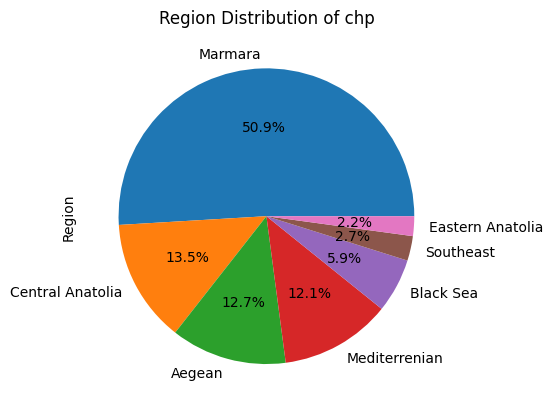

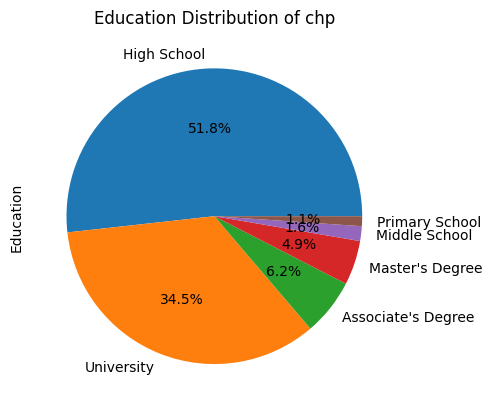

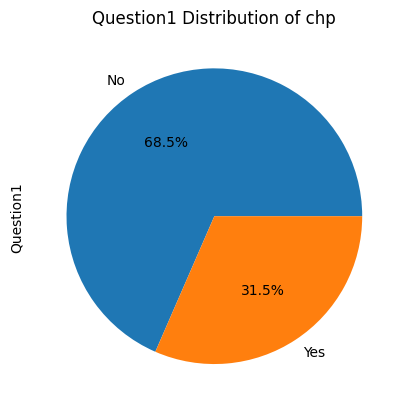

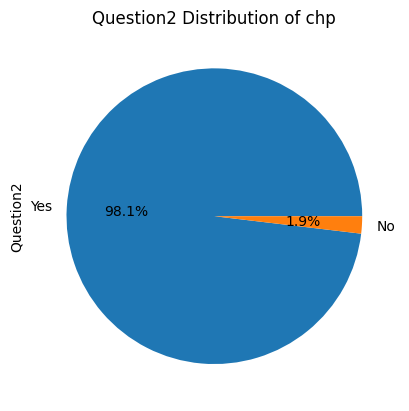

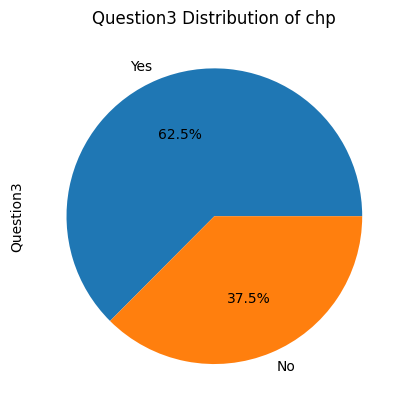

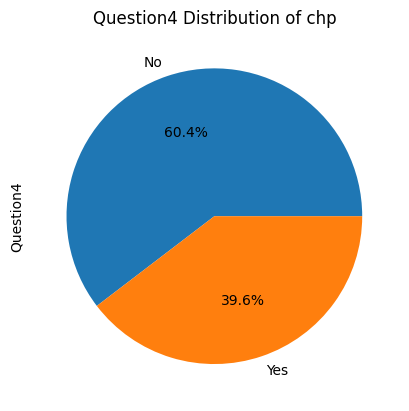

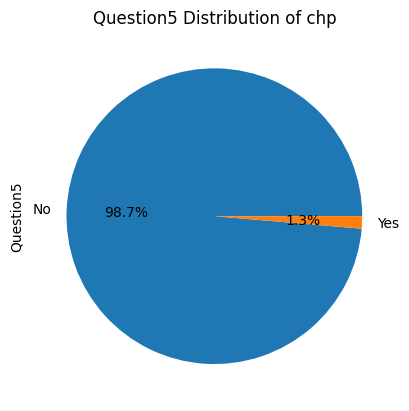

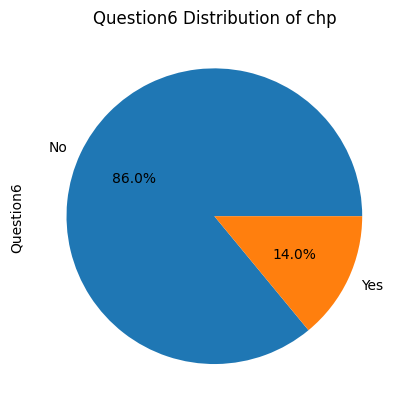

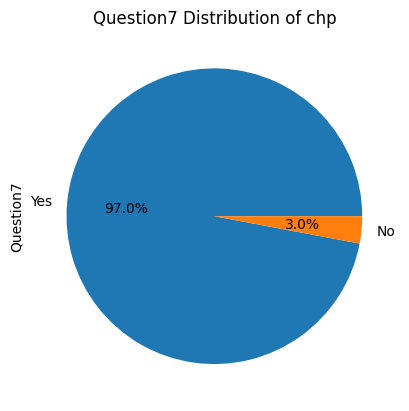

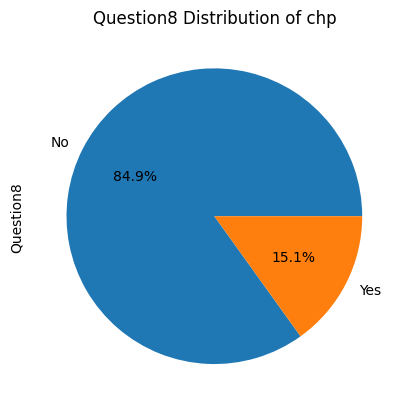

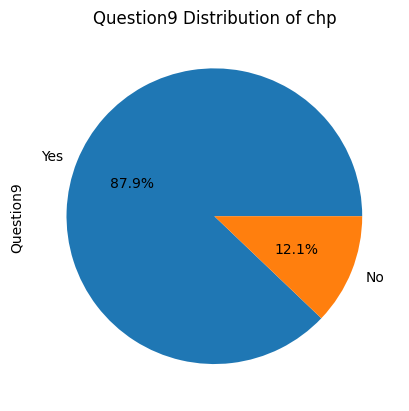

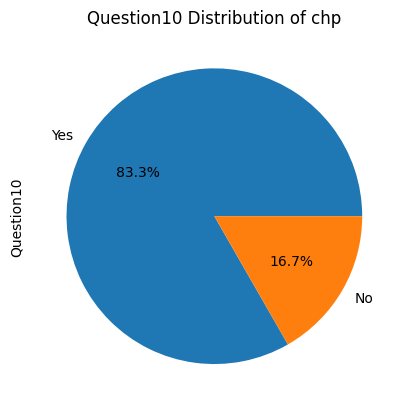

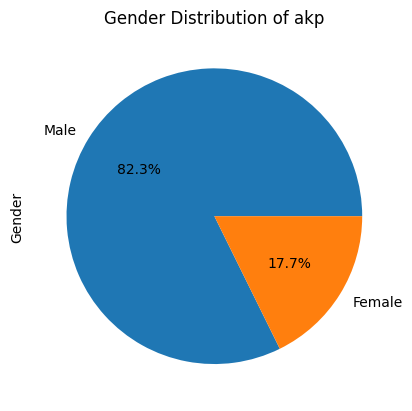

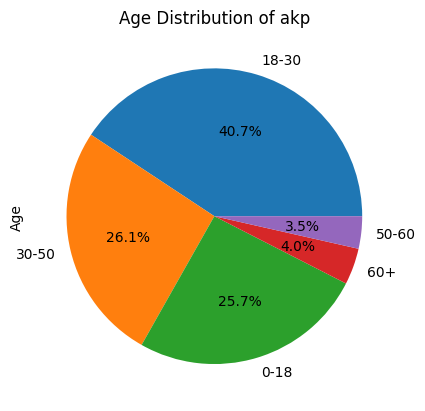

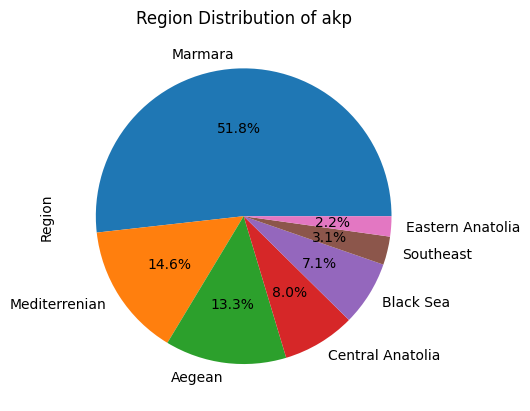

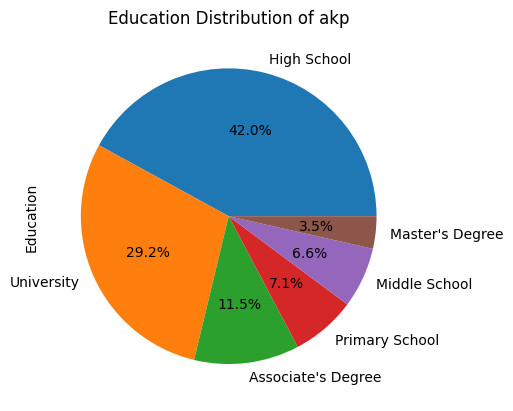

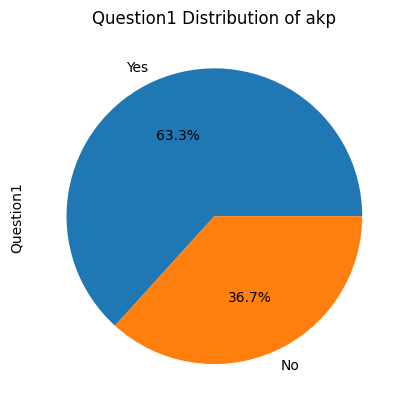

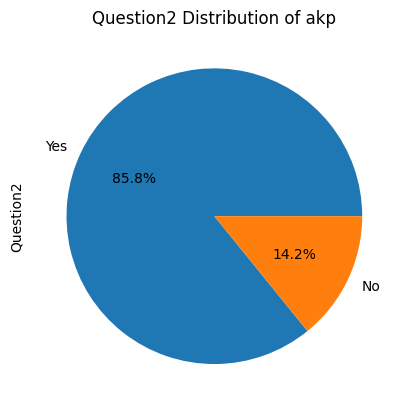

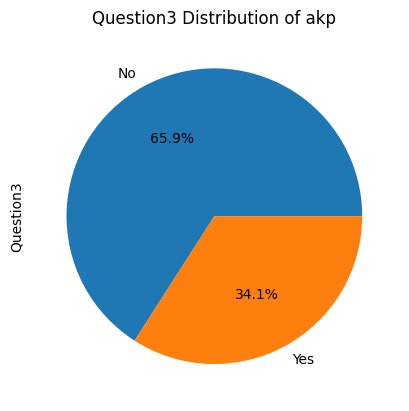

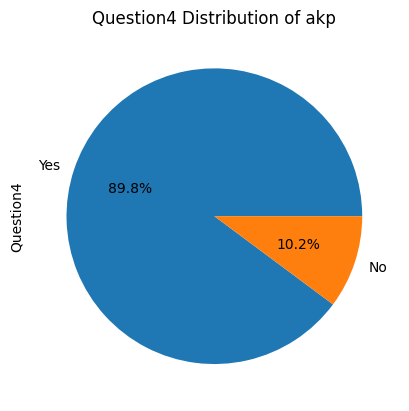

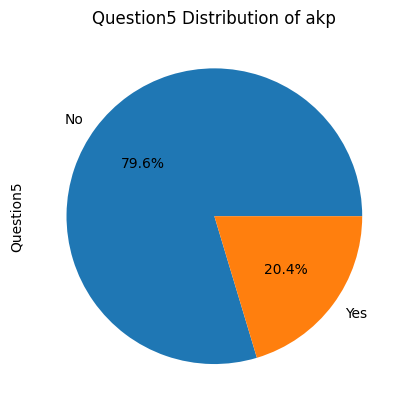

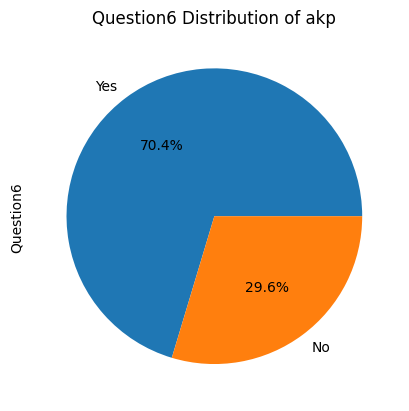

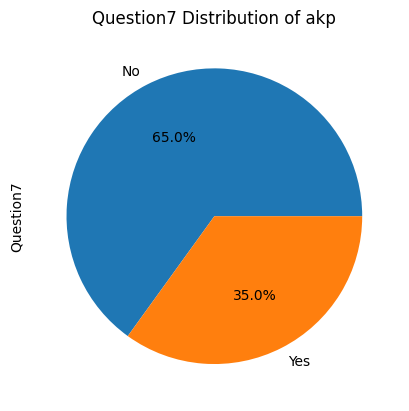

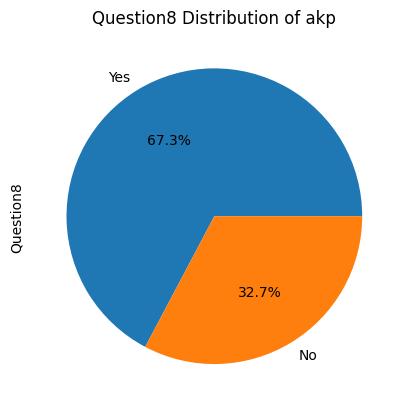

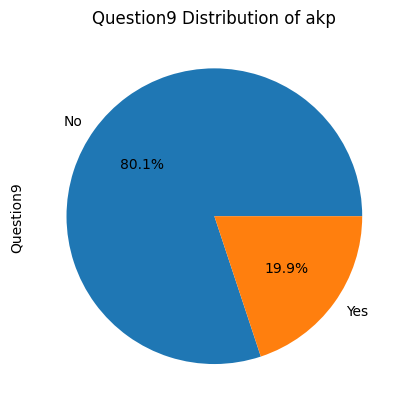

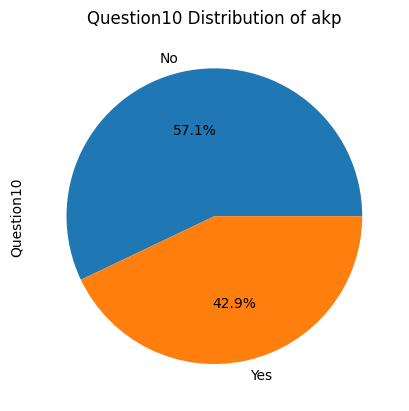

In [72]:
pie_distribution(chp, 'chp')
pie_distribution(akp, 'akp')

In [73]:
data['Gender'].replace(
    {'Male' : 0, 'Female' : 1}, inplace=True
)

data['Region'].replace(
    {
        'Marmara' : 0,
        'Southeast' : 1,
        'Mediterrenian' : 2, 
        'Eastern Anatolia' : 3,
        'Central Anatolia' : 4,
        'Black Sea' : 5,
        'Aegean' : 6
    }, inplace=True
)

data['Education'].replace(
    {
        'University' : 0 , 
        'High School' : 1, 
        "Associate's Degree" : 2, 
        "Master's Degree" : 3, 
        'Primary School' : 4,
        'Middle School': 5
    }, inplace=True
)

data['Party'].replace({'IYI PARTI' : 0 , 'AKP' : 1 , 'DIĞER' : 2 , 'HDP' : 3 , 'CHP' : 4 , 'MHP' : 5}, inplace=True)

data['Age'].replace(
    {
        '0-18' : 0,
        '18-30' : 1,
        '30-50' : 2,
        '50-60' : 3,
        '60+' : 4
    }, inplace=True
)

for quiestion in data.iloc[:, 4:14]:
    data[quiestion].replace({'Yes' : 1, 'No' : 0}, inplace=True)    

In [78]:
y = data['Party']
x = data.drop(columns='Party')

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.svm import SVC

model_svc = SVC(
    C=100.0, 
    degree=3,
    gamma='scale', 
    kernel='rbf'
)


model_svc.fit(x_train, y_train)

y_pred_svc = model_svc.predict(x_test)

accuracy_score(y_test, y_pred_svc)

In [ ]:
"{'C': 100.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}"
#! 37m 11.5s
param = [
    {
        'C': [1.0, 0.001, 0.01, 0.1, 10.0, 100.0],
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'degree': [3, 2, 4, 5],
        'gamma': ['scale', 'auto'] + [0.1, 0.01, 0.001, 0.0001, 0.00001]
    }
]

grid = GridSearchCV(
    estimator=model_svc, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(
    random_state=42,
    criterion='gini',
    max_depth =None, 
    max_features=None,
    min_samples_leaf=1, 
    min_samples_split=2,
    splitter='best'
)

model_dtc.fit(x_train, y_train)

y_pred_dtc = model_dtc.predict(x_test)

accuracy_score(y_test, y_pred_dtc)

In [ ]:
"""
{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}
"""
#! 4.5s
param = [
    {
        'criterion' : ['gini', 'entropy', 'log_loss'],
        'splitter' : ['best', 'random'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features' : [None, "auto", "sqrt", "log2"]
    }
]

grid = GridSearchCV(
    estimator=model_dtc, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(
    random_state=42,
    criterion='entropy',
    max_depth=None, 
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2
)

model_rfc.fit(x_train, y_train)

y_pred_rfc = model_rfc.predict(x_test)

accuracy_score(y_test, y_pred_rfc)

In [ ]:
'''
{
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2
}
'''
#! 1m 9.8s
param = [
    {
        'criterion' : ['gini', 'entropy', 'log_loss'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features' : ["sqrt", "log2", 'auto', None]
    }
]

grid = GridSearchCV(
    estimator=model_rfc, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(
    algorithm='ball_tree',
    leaf_size=40,
    n_neighbors=10, 
    metric='manhattan',
    weights='distance',
    n_jobs=-1,
    p=1
)

model_knn.fit(x_train, y_train)

y_pred_knn = model_knn.predict(x_test)

accuracy_score(y_test, y_pred_knn)

In [ ]:
"""
{'algorithm': 'ball_tree',
 'leaf_size': 40,
 'metric': 'manhattan',
 'n_jobs': -1,
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}
"""
#! 37.7s
param = [
    {
        'n_neighbors': [5, 3, 6, 7, 10, 15],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [30, 10, 20, 40],
        'p': [2, 1],
        'metric': ['minkowski' , 'manhattan', 'euclidean'],
        'n_jobs': [-1]
    }
]

grid = GridSearchCV(
    estimator=model_knn, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gradient = GradientBoostingClassifier(
    random_state=42,
    criterion='friedman_mse',
    learning_rate=0.1, 
    max_depth=7, 
    n_estimators=50,
    min_samples_leaf=1,
    min_samples_split=5,
    subsample=0.9
)

model_gradient.fit(x_train, y_train)

y_pred_gradient = model_gradient.predict(x_test)

accuracy_score(y_test, y_pred_gradient)

In [ ]:
'''
{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50,
 'subsample': 0.9}
 '''
#! 101m 46.1s
param = [
    {
        'loss' : ['log_loss', 'deviance', 'exponential'],
        'max_depth': [3, 5, 7],
        'subsample': [1.0, 0.9, 0.8],
        'min_samples_split': [2, 5, 10],
        'learning_rate': [0.1, 0.01, 0.2],
        'n_estimators': [100, 50, 200],
        'criterion' : ['friedman_mse', 'squared_error'],
        'min_samples_leaf': [1, 2, 4]
    }
]
grid = GridSearchCV(
    estimator=model_gradient, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_

In [ ]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(
    verbose=False,
    depth=6, 
    iterations=200, 
    learning_rate=0.5
)

model_cat.fit(x_train, y_train)

y_pred_cat = model_cat.predict(x_test)

accuracy_score(y_test, y_pred_cat)

In [ ]:
'''
{'depth': 8, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
'''
#! 1m 46.7s

param = [
    {
        'depth': [6, 8],
        'learning_rate': [0.03, 0.1],
        'iterations': [100, 200],
        'l2_leaf_reg': [1, 5],
    }
]

grid = GridSearchCV(
    estimator=model_cat, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_

In [ ]:
from xgboost import XGBClassifier

model_xgbc = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.2, 
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=1,
    n_estimators=200,
    reg_alpha=0,
    reg_lambda=0.1,
    subsample=0.8
)

model_xgbc.fit(x_train, y_train)

y_pred_xgbc = model_xgbc.predict(x_test)

accuracy_score(y_test, y_pred_xgbc)

In [ ]:
'''
{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 200,
 'reg_alpha': 0,
 'reg_lambda': 0.1,
 'subsample': 0.8}
 '''
 #! 5m 33.3s

param = [
    {
        'max_depth': [3, 7],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [50, 200],
        'min_child_weight': [1, 5],
        'subsample': [0.8, 1.0], 
        'colsample_bytree': [0.7, 0.9],
        'gamma': [0, 0.2],
        'reg_alpha': [0, 0.5],
        'reg_lambda': [0.1, 10.0] 
    }
]   

grid = GridSearchCV(
    estimator=model_xgbc, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_

In [ ]:
from lightgbm import LGBMClassifier

model_lgbmc = LGBMClassifier(
  colsample_bytree=1.0,
  learning_rate=0.2,
  min_split_gain=0.0,
  n_estimators=100,
  num_leaves=50,
  reg_alpha=0,
  subsample=1.0
)

model_lgbmc.fit(x_train, y_train)

y_pred_lgbmc = model_lgbmc.predict(x_test)

accuracy_score(y_test, y_pred_lgbmc)

In [ ]:
{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'num_leaves': 50,
 'reg_alpha': 0,
 'subsample': 1.0}

#! 1m 11.7s
param = [
    {
        'num_leaves': [31, 50, 100], 
        'learning_rate': [0.1, 0.2],
        'n_estimators': [100, 200],
        'subsample': [1.0, 0.8], 
        'colsample_bytree': [1.0, 0.8], 
        'reg_alpha': [0, 0.1], 
        'min_split_gain': [0.0, 0.1] 
    }
]

grid = GridSearchCV(
    estimator=model_lgbmc, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_   

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(),
    random_state=42,
)
 
model_ada.fit(x_train, y_train)

y_pred_ada = model_ada.predict(x_test)

accuracy_score(y_test, y_pred_ada)

In [ ]:
{'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 4,
 'learning_rate': 2.0,
 'n_estimators': 300}

#! 1m 17s
param = [
    {
        'learning_rate': [1.0, 0.01, 0.1, 2.0], 
        'n_estimators': [50, 100, 200, 300], 
        'base_estimator__max_depth': [1, 2, 3, 4],  
        'base_estimator__criterion': ['gini', 'entropy'], 
    }
]

grid = GridSearchCV(
    estimator=model_ada, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_

In [ ]:
from sklearn.ensemble import BaggingClassifier

model_bagging = BaggingClassifier(
    random_state=42,
    # max_features=0.8,
    # max_samples=1.0,
    # n_estimators=100
    max_features=1.0,
    max_samples=1.0
)

model_bagging.fit(x_train, y_train)

y_pred_bagging = model_bagging.predict(x_test)

accuracy_score(y_test, y_pred_bagging)

In [ ]:
{'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 200,
 'n_jobs': -1}
#! 1m 2.2s

param = [
    {
        'n_estimators': [10, 50, 100, 200],  
        'max_samples': [1.0, 0.5, 0.8, 1.5],  
        'max_features': [1.0, 0.5, 0.8, None], 
        'bootstrap': [True, False],  
        'bootstrap_features': [False, True], 
        'n_jobs': [-1]  
    }
]

grid = GridSearchCV(
    estimator=model_bagging, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_

In [ ]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(
    random_state=42,
    activation='logistic',
    alpha=0.0001,
    hidden_layer_sizes=(100, ),
    max_iter=300,
    solver='lbfgs'
)

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'max_iter': 300,
 'solver': 'lbfgs'}

model_mlp.fit(x_train, y_train)

y_pred_mlp = model_mlp.predict(x_test)

accuracy_score(y_test, y_pred_mlp)

In [ ]:
{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'max_iter': 300,
 'solver': 'lbfgs'}

#! 4m 6.6s

param = [
    {
        'hidden_layer_sizes': [(100,), (50,)],
        'activation': ['relu', 'identity', 'logistic', 'tanh'],
        'solver': ['adam', 'lbfgs', 'sgd'],
        'alpha': [0.0001, 0.01],
        'max_iter': [200, 100, 300]
    }
]

grid = GridSearchCV(
    estimator=model_mlp, param_grid=param, cv=10, n_jobs=-1
).fit(x_train, y_train)

grid.best_params_

In [96]:
Gender = int(input("Gender (Male-0 & Female-1):"))

Age = int(input(
    """
        0-18 : 0 \n
        18-30 : 1 \n
        30-50 : 2 \n
        50-60 : 3 \n
        60+ : 4 
    """
))

Region = int(input(
    '''
        Marmara : 0, \n
        Güneydoğu : 1\n
        Akdeniz : 2\n
        Doğu Anadolu : 3\n
        İç Anadolu : 4\n
        Karadeniz : 5\n
        Ege : 6
    '''
))

Education = int(input(
    '''
        Lisans : 0 \n
        Lise : 1\n
        Ön Lisans : 2 \n
        Lisans Üstü : 3 \n
        İlkokul : 4\n
        Ortaokul : 5
    '''
))

Question1 = int(input(
    '''
        Yes=1, No=0 \n
        Do you think our Economic Status is good?
    '''
))

Question2 = int(input(
    '''
        Yes=1, No=0 \n
        Need Reform in Education?
    '''
))

Question3 = int(input(
    '''
        Yes=1, No=0 \n
        Resolve Privatization Are You?
    '''
))

Question4 = int(input(
    '''
        Yes=1, No=0 \n
        Should the state use a penalty like death penalty for certain crimes?
    '''
))

Question5 = int(input(
    '''
        Yes=1, No=0 \n
        Do you find our journalists neutral enough?
    '''
))

Question6 = int(input(
    '''
        Yes=1, No=0 \n
        From 22:00 am Then Are You Supporting the Prohibition to Buy Drinks?
    '''
))

Question7 = int(input(
    '''
        Yes=1, No=0 \n
        Do You Want to Live in a Secular State?
    '''
))

Question8 = int(input(
    '''
        Yes=1, No=0 \n
        Are you supporting the abortion ban?
    '''
))

Question9 = int(input(
    '''
        Yes=1, No=0 \n
        Do you think that the extraordinary state (Ohal) restricts Freedoms?
    '''
))

Question10 = int(input(
    '''
        Yes=1, No=0 \n
        Would you like a new part of the parliament to enter?
    '''
))

In [97]:
all_models = [
    model_svc, model_dtc, 
    model_rfc, model_knn, 
    model_cat, model_xgbc,
    model_lgbmc, model_gradient,
    model_ada, model_bagging, 
    model_mlp
]


answer = [
    Gender, Age, Region, 
    Education, Question1, Question2, Question3, 
    Question4, Question5, Question6, Question7, 
    Question8, Question9, 
    Question10
]

answer_df = pd.DataFrame(columns=x.columns)

In [102]:
for i in range(0, len(x.columns)):
    answer_df[x.columns[i]] = [answer[i]]

liste = []
for pred in all_models:
    liste.append(pred.predict(answer_df))

stringli = []

for i in range(len(liste)):
    
    if i != 4:

        stringli.append(int(liste[i][0]))
    else:

        stringli.append(int(liste[i][0][0]))

stringli_df = pd.DataFrame(columns=['pred'], )

stringli_df['pred'] = stringli


opinion = int(f'{stringli_df.value_counts().idxmax()}'[1])

if opinion == 0:

    print('According to the answers you gave above, your opinion are closer to answers given by IYI PARTI voters')

elif opinion == 1:

    print('According to the answers you gave above, your opinion are closer to answers given by AKP voters')

elif opinion == 2:

    print('According to the answers you gave above, your opinion are closer to answers given by DIĞER voters')

elif opinion == 3:

    print('According to the answers you gave above, your opinion are closer to answers given by HDP voters')

elif opinion == 4:

    print('According to the answers you gave above, your opinion are closer to answers given by CHP voters')

elif opinion == 5:

    print('According to the answers you gave above, your opinion are closer to answers given by MHP voters')


According to the answers you gave above, your opinion are closer to answers given by DIĞER voters


In [139]:
Real_party = int(
    input(
        '''
            Enter your current party you are supporting:
            (0-IYI PARTI, 1-AKP, 2-DIĞER, 3-HDP, 4-CHP, 5-MHP
        '''
))

data.loc[len(data)] = [
    Gender, Age, Region, Education,
    Question1, Question2, Question3, Question4, Question5,
    Question6, Question7, Question8, Question9, Question10,
    Real_party
]

In [140]:
from datetime import datetime

Timestamp_new = None

current_time = datetime.now()
date_format = "%d/%m/%Y %H:%M:%S"

formatted_time = current_time.strftime(date_format)

Timestamp_new = formatted_time

# ---------------------------- Gender ----------------------------
Cinsiyet_new = None 

if Gender == [0]:
    Cinsiyet_new = 'Erkek'
else:
    Cinsiyet_new = "Kadın"

# ---------------------------- Age ----------------------------
Yas_new = None

if Age == 0:
    Yas_new = '0-18'
elif Age == 1:
    Yas_new = '18-30'
elif Age == 2:
    Yas_new = '30-50'
elif Age == 3:
    Yas_new = '50-60'
elif Age == 4:
    Yas_new = '60+'

# ---------------------------- Region ----------------------------
Bolge_new = None

if Region ==  0:
    Bolge_new = 'Marmara'
elif Region == 1:
    Bolge_new = 'Ege'
elif Region == 2:
    Bolge_new = 'Karadeniz'
elif Region == 3:
    Bolge_new = 'Akdeniz'
elif Region == 4:
    Bolge_new = 'İç Anadolu'
elif Region == 5:
    Bolge_new = 'Doğu Anadolu'
elif Region == 6:
    Bolge_new = 'Güneydoğu'


# ---------------------------- Education ----------------------------
Egitim_new = None 

if Education == 0:
    Egitim_new = 'Lisans'

elif Education == 1:
    Egitim_new = 'Lise'

elif Education == 2:
    Egitim_new = 'Ön Lisans'

elif Education == 3:
    Egitim_new = 'Lisans Üstü'

elif Education == 4:
    Egitim_new = 'İlkokul'
    
elif Education == 5:
    Egitim_new = 'Ortaokul'

# ---------------------------- sorular ----------------------------
def Question_generator(qstn):

    if qstn == 1:
        return 'Evet'
    else:
        return 'Hayır'

Question1_new = Question_generator(Question1)
Question2_new = Question_generator(Question2)
Question3_new = Question_generator(Question3)
Question4_new = Question_generator(Question4)
Question5_new = Question_generator(Question5)
Question6_new = Question_generator(Question6)
Question7_new = Question_generator(Question7)
Question8_new = Question_generator(Question8)
Question9_new = Question_generator(Question9)
Question10_new = Question_generator(Question10)


# ---------------------------- parti ----------------------------
parti_new = None

if Real_party == 0:
    parti_new = 'IYI PARTI'
elif Real_party == 1:
    parti_new = 'AKP'
elif Real_party == 2:
    parti_new = 'DIĞER'
elif Real_party == 3:
    parti_new = 'HDP'
elif Real_party == 4:
    parti_new = 'CHP'
elif Real_party == 5:
    parti_new = 'MHP'

In [141]:
import csv

new_ = [
    Timestamp_new, Cinsiyet_new, Yas_new, Bolge_new, Egitim_new, Question1_new, Question2_new, Question3_new, Question4_new, Question5_new,
    Question6_new, Question7_new, Question8_new, Question9_new, Question10_new, parti_new
]
with open('./data/model_output.csv', mode='a', encoding='utf-8', newline='\n') as file:
    opinion = csv.writer(file)
    opinion.writerow(new_)

In [ ]:
# for i in range(1, 17):
#     print(ws.cell(4, i).value)